In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('loan.csv')

D:\kilobyte\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.columns[46]

'last_pymnt_amnt'

In [5]:
a=df.isnull().sum()==39717

In [6]:
a.value_counts()

False    57
True     54
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [8]:
df.total_bc_limit.count()

0

In [9]:
df=df.drop(df.columns[df.apply(lambda col: col.isnull().sum()/len(df) == 1.0)], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [11]:
(df.isnull().sum()/len(df)) *100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [12]:
numeric_data = df.select_dtypes(include = [np.number])
categorical_data = df.select_dtypes(exclude = [np.number])
print('There are {0} numerical and {1} categorical features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 33 numerical and 24 categorical features in the training data


In [13]:
categorical_data.columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

In [14]:
numeric_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [15]:
corr=numeric_data.corr()

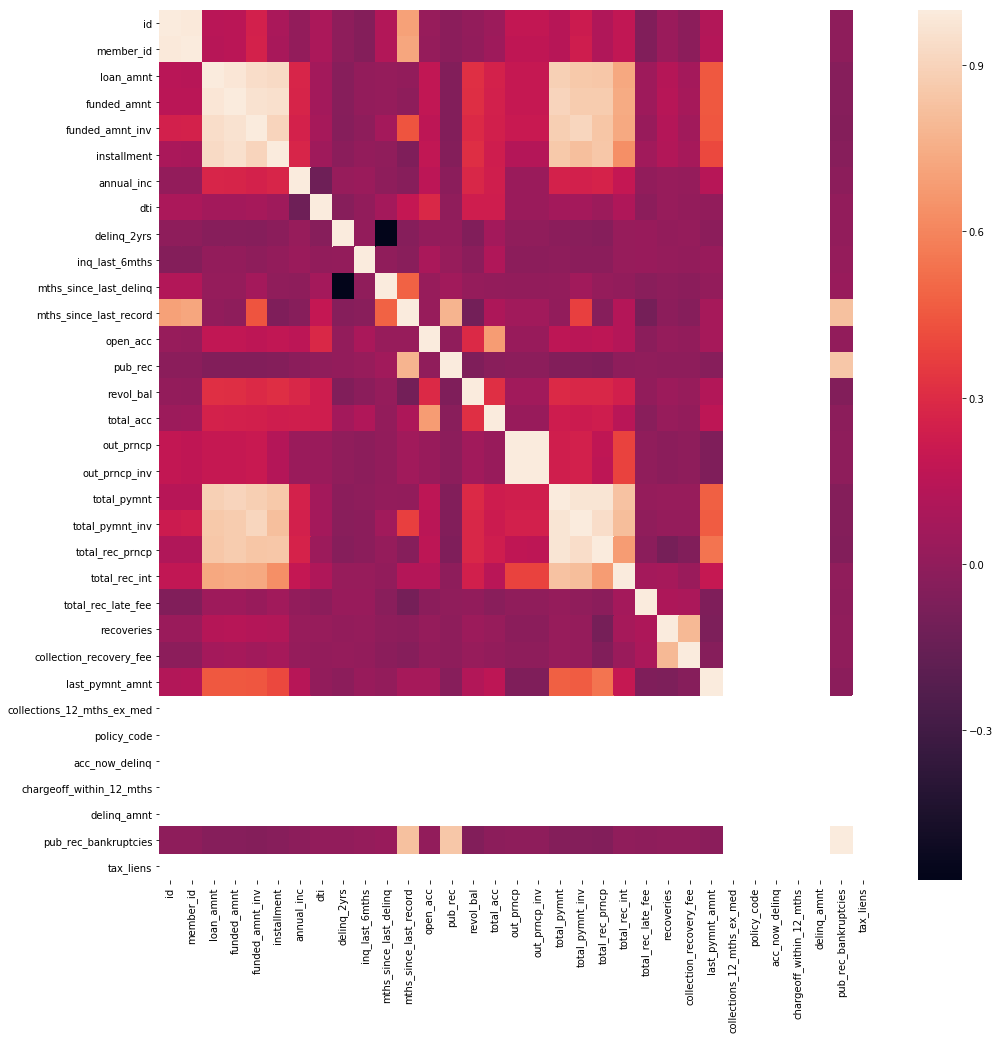

In [16]:
plt.figure(figsize=(16, 16))
sns.heatmap(corr)

In [17]:
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [18]:
df.pymnt_plan.value_counts()

n    39717
Name: pymnt_plan, dtype: int64

In [19]:
df.columns[(df.nunique()!=1) & (df.count !=len(df))]

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [20]:
df_m=df.drop(df.columns[(df.nunique()!=1)|(df.count()!=39717)],axis=1)

In [21]:
df=df.drop(df_m.columns,axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
url     

In [23]:
df_m.count()

pymnt_plan             39717
initial_list_status    39717
policy_code            39717
application_type       39717
acc_now_delinq         39717
delinq_amnt            39717
dtype: int64

In [24]:
categorical_data.nunique()

term                       2
int_rate                 371
grade                      7
sub_grade                 35
emp_title              28820
emp_length                11
home_ownership             5
verification_status        3
issue_d                   55
loan_status                3
pymnt_plan                 1
url                    39717
desc                   26527
purpose                   14
title                  19615
zip_code                 823
addr_state                50
earliest_cr_line         526
revol_util              1089
initial_list_status        1
last_pymnt_d             101
next_pymnt_d               2
last_credit_pull_d       106
application_type           1
dtype: int64

In [25]:
df.next_pymnt_d.value_counts()

Jun-16    1125
Jul-16      15
Name: next_pymnt_d, dtype: int64

In [26]:
df.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [27]:
df.int_rate=df.int_rate.apply(lambda x:x.split('%')[0])

In [28]:
df.int_rate=df.int_rate.astype(float)

In [29]:
df.grade.value_counts()

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

In [30]:
df.grade=df.grade.replace({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

In [31]:
df.emp_length=df.emp_length.replace({'10+ years':10,'< 1 year':1})

In [32]:
df.emp_length=(df.emp_length.astype(str).apply(lambda x:x.split(' ')[0])).astype(float)

In [33]:
df.emp_length.corr(df.int_rate)

0.005764739780029164

In [34]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [35]:
df.loan_status=df.loan_status.replace({'Fully Paid':1,'Charged Off':2,'Current':3})

In [36]:
(numeric_data.count()/len(df))*100

id                            100.000000
member_id                     100.000000
loan_amnt                     100.000000
funded_amnt                   100.000000
funded_amnt_inv               100.000000
installment                   100.000000
annual_inc                    100.000000
dti                           100.000000
delinq_2yrs                   100.000000
inq_last_6mths                100.000000
mths_since_last_delinq         35.337513
mths_since_last_record          7.014628
open_acc                      100.000000
pub_rec                       100.000000
revol_bal                     100.000000
total_acc                     100.000000
out_prncp                     100.000000
out_prncp_inv                 100.000000
total_pymnt                   100.000000
total_pymnt_inv               100.000000
total_rec_prncp               100.000000
total_rec_int                 100.000000
total_rec_late_fee            100.000000
recoveries                    100.000000
collection_recov

In [37]:
numeric_data.tax_liens.isna().sum()

39

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null int64
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null float64
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null int64
url     

In [39]:
df=df.drop('url',axis=1)

In [40]:
df=df.drop('desc',axis=1)

In [41]:
df=df.drop('title',axis=1)

In [42]:
df.zip_code=df.zip_code.apply(lambda x:x.split('xx')[0]).astype(int)

In [43]:
df.annual_inc.corr(df.loan_amnt)

0.2711485508165453

In [44]:
df[df.columns[1:]].corr()['loan_status'][:]

member_id                     0.148226
loan_amnt                     0.132566
funded_amnt                   0.129093
funded_amnt_inv               0.122327
int_rate                      0.246591
installment                   0.058768
grade                         0.214601
emp_length                    0.047629
annual_inc                   -0.018711
loan_status                   1.000000
zip_code                      0.004322
dti                           0.057713
delinq_2yrs                   0.013581
inq_last_6mths                0.043814
mths_since_last_delinq        0.007360
mths_since_last_record        0.093055
open_acc                      0.009954
pub_rec                       0.031822
revol_bal                     0.026956
total_acc                    -0.004407
out_prncp                     0.528067
out_prncp_inv                 0.527508
total_pymnt                  -0.046620
total_pymnt_inv              -0.038844
total_rec_prncp              -0.165251
total_rec_int            

In [45]:
df.verification_status.value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [46]:
df.verification_status=df.verification_status.replace({'Not Verified':1,'Verified':2,'Source Verified':3})

In [47]:
df.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [48]:
df.home_ownership=df.home_ownership.replace({'RENT':1,'MORTGAGE':2,'OWN':3,'OTHER':4,'NONE':5}).astype(int)

In [49]:
df.home_ownership=df.home_ownership.astype(int)

In [50]:
df.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [51]:
df.term=df.term.apply(lambda x:x.split(' ')[1]).astype(int)

In [52]:
df.loan_status.value_counts()

1    32950
2     5627
3     1140
Name: loan_status, dtype: int64

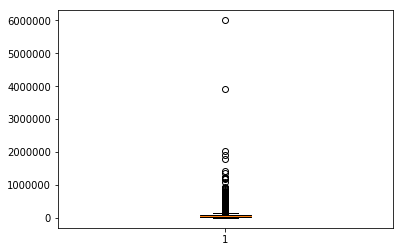

In [53]:
plt.boxplot(df.annual_inc)
plt.show()

In [54]:
dfs=df.loc[df.loan_status==2]

In [55]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5627 entries, 1 to 39688
Data columns (total 48 columns):
id                            5627 non-null int64
member_id                     5627 non-null int64
loan_amnt                     5627 non-null int64
funded_amnt                   5627 non-null int64
funded_amnt_inv               5627 non-null float64
term                          5627 non-null int32
int_rate                      5627 non-null float64
installment                   5627 non-null float64
grade                         5627 non-null int64
sub_grade                     5627 non-null object
emp_title                     5143 non-null object
emp_length                    5399 non-null float64
home_ownership                5627 non-null int32
annual_inc                    5627 non-null float64
verification_status           5627 non-null int64
issue_d                       5627 non-null object
loan_status                   5627 non-null int64
purpose                      

In [56]:
df.annual_inc.describe().astype(int)

count      39717
mean       68968
std        63793
min         4000
25%        40404
50%        59000
75%        82300
max      6000000
Name: annual_inc, dtype: int32

In [57]:
df.annual_inc.quantile(q=0.99)

234999.36

In [58]:
df.loc[df.annual_inc==142000.0]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
1743,623231,798733,5000,5000,5000.00000,36,12.69,167.73,2,B5,...,180.84,1.6108,May-14,167.73,NaN,Oct-14,0.0,0.0,0.0,0.0
4804,980136,1203516,35000,35000,34950.00000,60,17.27,874.93,4,D3,...,0.00,0.0000,Apr-16,3802.68,NaN,Apr-16,0.0,0.0,0.0,0.0
7466,881955,1097168,30000,30000,28830.75975,60,23.13,847.96,7,G2,...,0.00,0.0000,Mar-13,844.08,NaN,Feb-13,0.0,0.0,0.0,0.0
12833,791264,995549,24500,24500,24475.00000,60,15.23,585.82,3,C5,...,0.00,0.0000,Apr-12,22490.93,NaN,Apr-12,0.0,0.0,0.0,0.0
14631,762858,950916,15000,15000,15000.00000,36,10.99,491.01,2,B3,...,0.00,0.0000,Sep-13,4750.12,NaN,Sep-13,0.0,0.0,0.0,0.0
22472,628540,805367,25000,25000,24850.00000,60,14.83,592.52,4,D3,...,0.00,0.0000,Nov-15,1180.44,NaN,May-16,0.0,0.0,0.0,0.0
26384,570330,733685,10000,10000,9775.00000,36,11.12,327.96,2,B3,...,0.00,0.0000,Mar-12,5765.97,NaN,Mar-12,0.0,0.0,0.0,0.0
27092,558588,719048,18000,18000,17500.00000,36,10.38,584.03,2,B1,...,0.00,0.0000,Feb-13,3997.71,NaN,Mar-15,0.0,0.0,0.0,0.0
28386,538287,695228,7500,7500,7500.00000,36,7.88,234.61,1,A5,...,0.00,0.0000,Mar-13,1160.29,NaN,Nov-15,0.0,0.0,0.0,0.0
30057,514306,664803,3000,3000,2975.00000,36,7.88,93.85,1,A5,...,0.00,0.0000,Jun-10,3020.19,NaN,May-16,0.0,0.0,0.0,0.0


In [59]:
def classify(x):
    if x <= 40404:
        return 0
    if (x <=59000) & (x > 40404):
        return 1
    if (x <=82300) & (x >59000):
        return 2
    if (x<=142000)&(x > 82300):
        return 3
    if x>142000:
        return 4
    

In [60]:
df.ic=df.annual_inc.astype(int).apply(classify)

D:\kilobyte\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [61]:
df.ic.value_counts()

1    9960
0    9930
2    9898
3    7955
4    1974
Name: annual_inc, dtype: int64

In [62]:
print(classify(df.annual_inc[4].astype(int)))

2


In [63]:
x=df.annual_inc[4].astype(int)

In [64]:
df.ic.corr(df.loan_status)

-0.025580905539097365

In [65]:
df[df.columns[1:]].corr()['loan_status'][:]

member_id                     0.148226
loan_amnt                     0.132566
funded_amnt                   0.129093
funded_amnt_inv               0.122327
term                          0.313396
int_rate                      0.246591
installment                   0.058768
grade                         0.214601
emp_length                    0.047629
home_ownership                0.006842
annual_inc                   -0.018711
verification_status           0.056358
loan_status                   1.000000
zip_code                      0.004322
dti                           0.057713
delinq_2yrs                   0.013581
inq_last_6mths                0.043814
mths_since_last_delinq        0.007360
mths_since_last_record        0.093055
open_acc                      0.009954
pub_rec                       0.031822
revol_bal                     0.026956
total_acc                    -0.004407
out_prncp                     0.528067
out_prncp_inv                 0.527508
total_pymnt              

In [66]:
df.dti.corr(df.loan_status)

0.057713225827975605

In [67]:
df.out_prncp.describe()

count    39717.000000
mean        51.227887
std        375.172839
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6311.470000
Name: out_prncp, dtype: float64

In [68]:
df.out_prncp.count()

39717

In [69]:
df.out_prncp.value_counts()

0.00       38577
827.13         2
2277.11        2
1972.60        2
2963.24        2
749.32         1
1204.88        1
942.68         1
2812.85        1
2853.89        1
2305.70        1
1398.59        1
1551.40        1
1975.52        1
1579.37        1
5482.19        1
2144.54        1
1476.83        1
998.86         1
1682.07        1
891.83         1
2606.86        1
641.30         1
1096.03        1
2330.05        1
1765.69        1
2281.18        1
1296.57        1
2192.31        1
4096.40        1
           ...  
628.59         1
408.01         1
3480.79        1
4124.43        1
1961.61        1
2298.67        1
909.53         1
1880.75        1
545.51         1
1264.71        1
671.61         1
1492.76        1
2839.43        1
578.35         1
848.07         1
3228.51        1
233.69         1
456.16         1
3442.91        1
346.17         1
4464.46        1
2833.43        1
1925.42        1
1023.30        1
561.02         1
1001.31        1
3373.62        1
3505.27       

In [70]:
df.int_rate.describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [71]:
dfs.int_rate.describe()

count    5627.000000
mean       13.820432
std         3.654413
min         5.420000
25%        11.310000
50%        13.610000
75%        16.400000
max        24.400000
Name: int_rate, dtype: float64

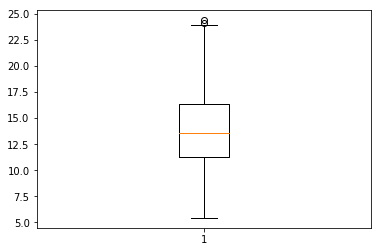

In [72]:
plt.boxplot(dfs.int_rate)
plt.show()

In [73]:
df1=pd.read_csv('loan.csv')

D:\kilobyte\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [77]:
df1=df1.drop(df1.columns[df1.apply(lambda col: col.isnull().sum()/len(df) == 1.0)], axis=1)

D:\kilobyte\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
D:\kilobyte\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
D:\kilobyte\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
D:\kilobyte\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is

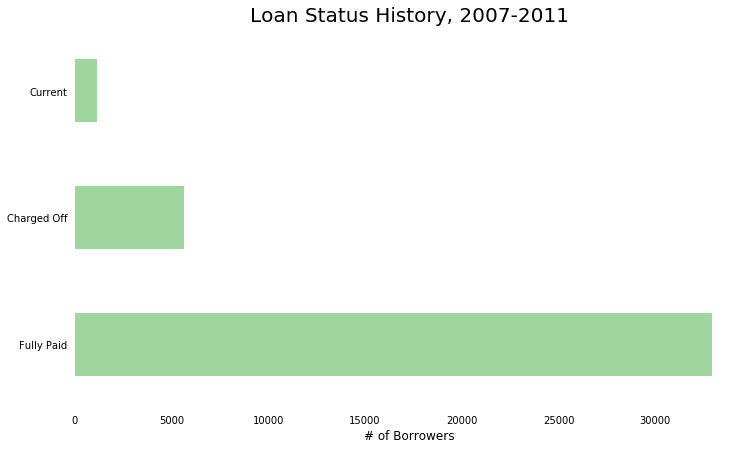

In [78]:
freq_loan_status = df1['loan_status'].value_counts() 

fig, ax = plt.subplots(figsize=(12,7))
freq_loan_status.plot(kind='barh',alpha=0.75, rot=0, colormap=plt.cm.Accent)

plt.title('Loan Status History, 2007-2011', size=20)
plt.xlabel('# of Borrowers', size=12)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(top="off", left="off", right="off", bottom='off')

In [83]:
df1=df1.loc[(df1.loan_status=='Fully Paid')|(df1.loan_status=='Charged Off')]

In [87]:
df1.loan_status=df1.loan_status.astype('category').cat.codes

In [88]:
df1.loan_status.value_counts()

1    32950
0     5627
Name: loan_status, dtype: int64

In [95]:
df1.addr_state.value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
OR     435
AL     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
HI     166
NH     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

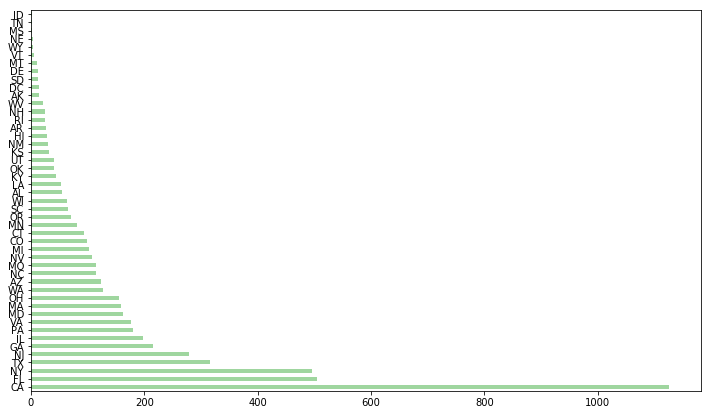

In [94]:
fre=a['addr_state'].value_counts() 
fig, ax = plt.subplots(figsize=(12,7))
fre.plot(kind='barh',alpha=0.75, rot=0, colormap=plt.cm.Accent)


In [93]:
a=df1.loc[df1.loan_status==0]

In [118]:
df.issue_d.value_counts()

Dec-11    2260
Nov-11    2223
Oct-11    2114
Sep-11    2063
Aug-11    1928
Jul-11    1870
Jun-11    1827
May-11    1689
Apr-11    1562
Mar-11    1443
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
Aug-08      71
May-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [121]:
df1.year=df1.issue_d.apply(lambda x:'20'+x.split('-')[1]).astype('int')

In [122]:
df1.year

0        2011
1        2011
2        2011
3        2011
5        2011
6        2011
7        2011
8        2011
9        2011
10       2011
11       2011
12       2011
13       2011
14       2011
15       2011
16       2011
17       2011
18       2011
19       2011
20       2011
21       2011
22       2011
23       2011
24       2011
25       2011
26       2011
27       2011
28       2011
29       2011
30       2011
         ... 
39687    2007
39688    2007
39689    2007
39690    2007
39691    2007
39692    2007
39693    2007
39694    2007
39695    2007
39696    2007
39697    2007
39698    2007
39699    2007
39700    2007
39701    2007
39702    2007
39703    2007
39704    2007
39705    2007
39706    2007
39707    2007
39708    2007
39709    2007
39710    2007
39711    2007
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: issue_d, Length: 38577, dtype: int32

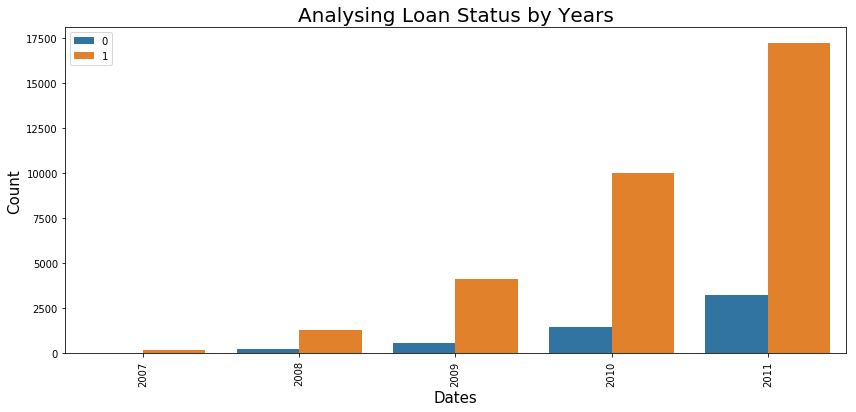

In [124]:
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(x=df1.year, data=df1,
                  hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Analysing Loan Status by Years", fontsize=20)
plt.show()


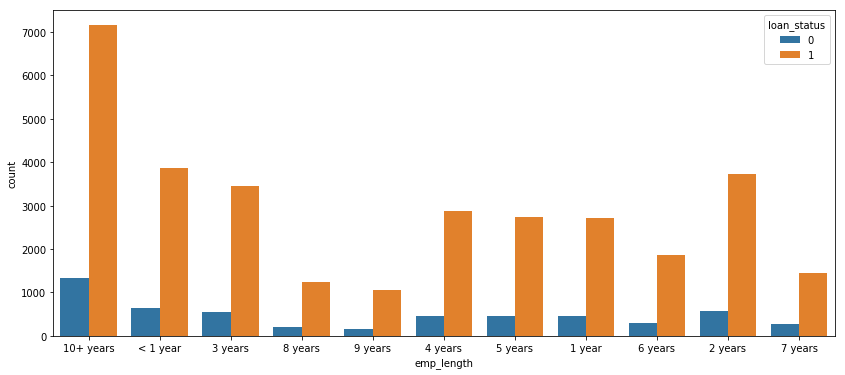

In [127]:
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(x=df1.emp_length, data=df1,
                  hue='loan_status')

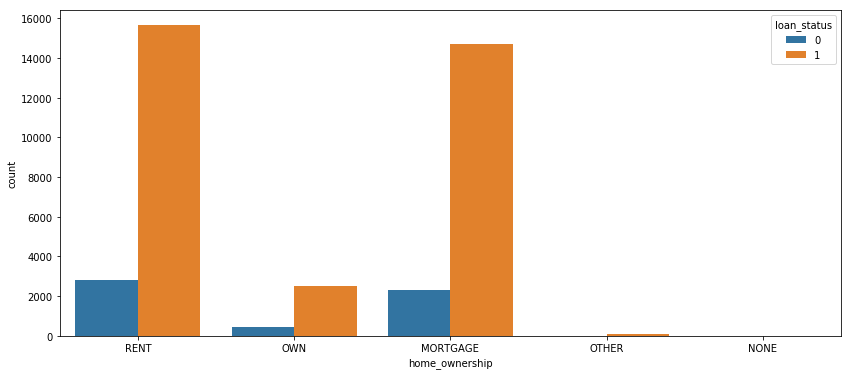

In [128]:
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(x=df1.home_ownership, data=df1,
                  hue='loan_status')

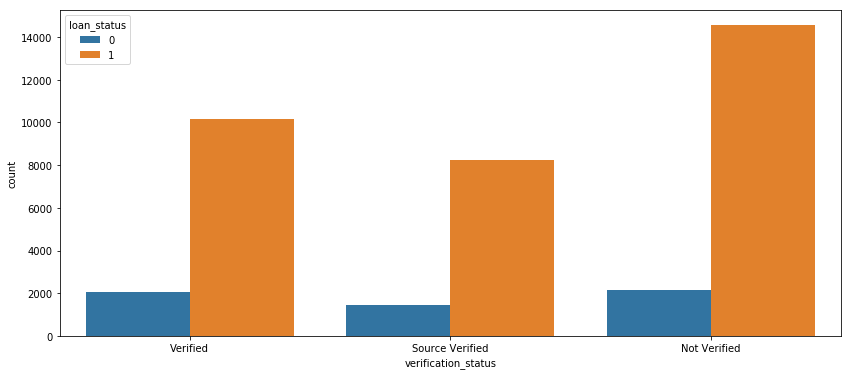

In [129]:
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(x=df1.verification_status, data=df1,
                  hue='loan_status')

In [131]:
df1.purpose.nunique()

14

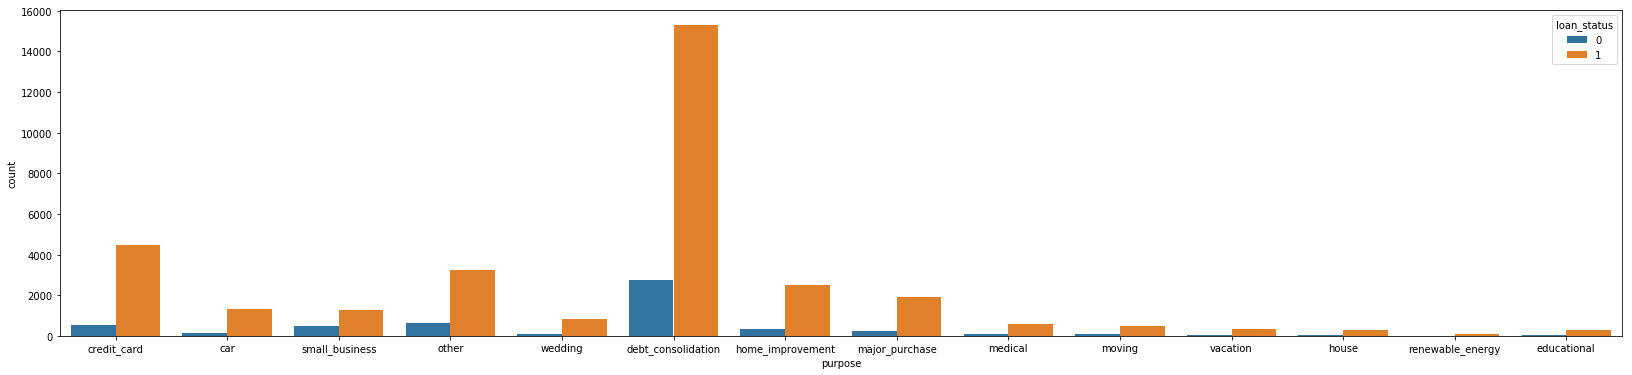

In [134]:
plt.figure(figsize = (28,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(x=df1.purpose, data=df1,
                  hue='loan_status')

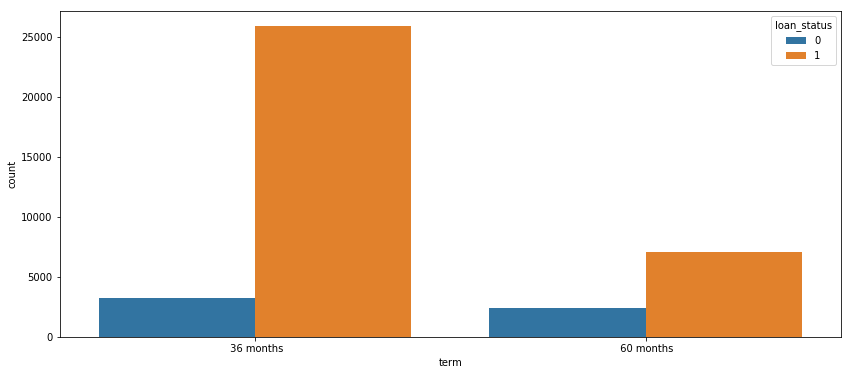

In [135]:
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(x=df1.term, data=df1,
                  hue='loan_status')

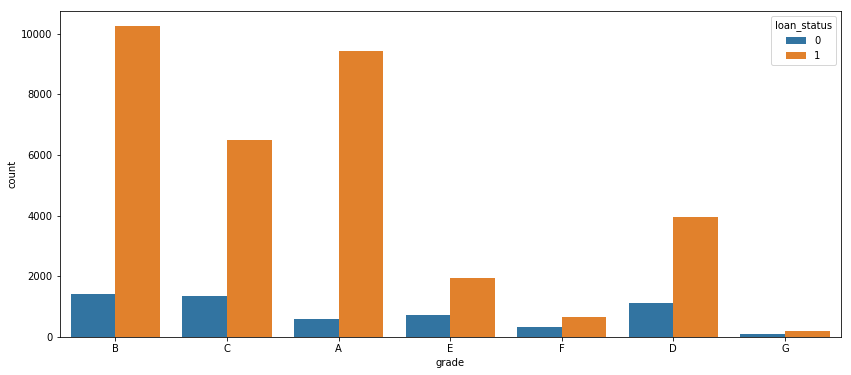

In [136]:
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(x=df1.grade, data=df1,
                  hue='loan_status')

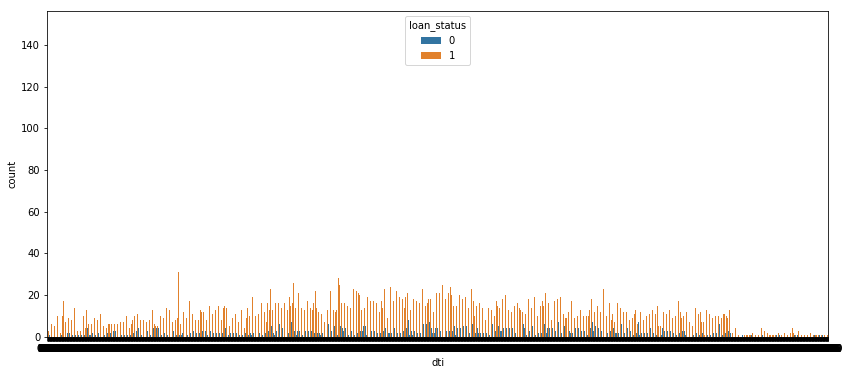

In [137]:
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(x=df1.dti, data=df1,
                  hue='loan_status')